In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [2]:
cols = ["fkengh", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "Alpha", "fDist", "class"]

In [3]:
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fkengh,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,Alpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"] = (df["class"] == "g").astype(int)

In [5]:
df.head()

,fkengh,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,Alpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


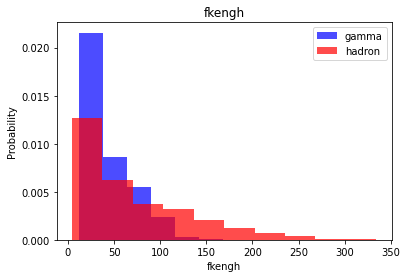

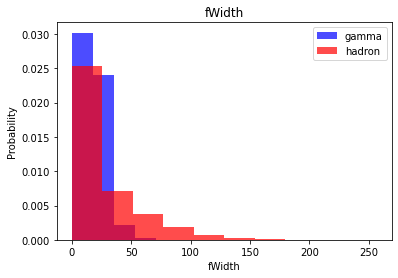

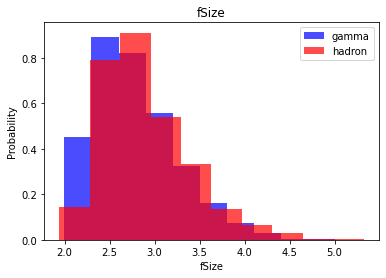

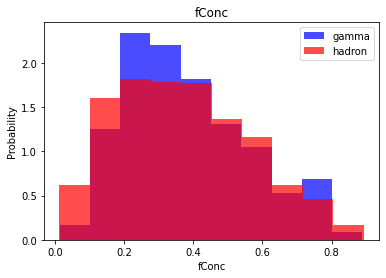

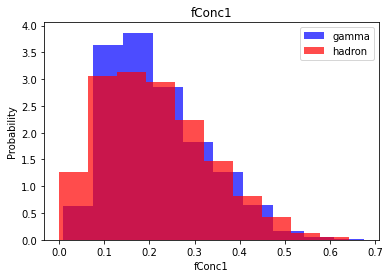

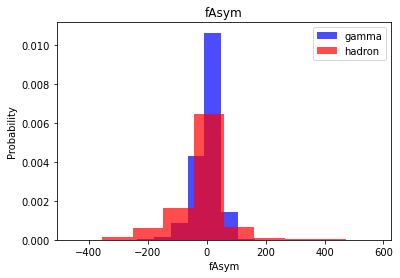

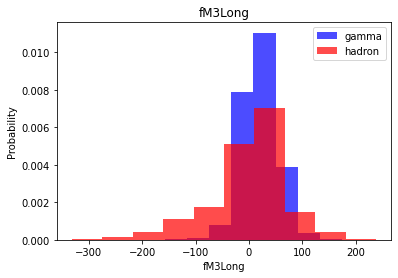

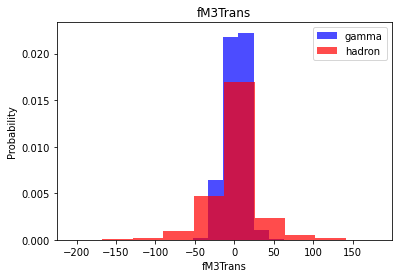

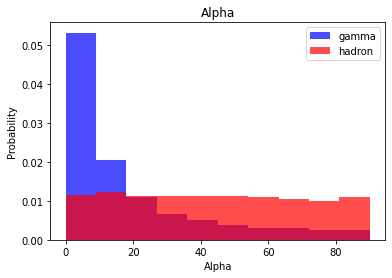

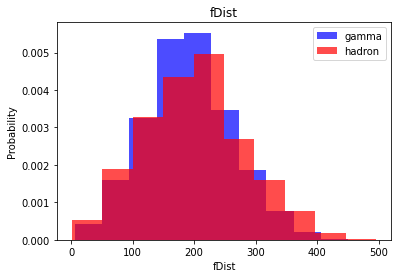

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation, test datasets

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [8]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
        
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y
    

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn_model.predict(X_test)

In [13]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [14]:
y_test

array([1, 0, 1, ..., 0, 0, 1])

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1322
           1       0.87      0.87      0.87      2482

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [18]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1322
           1       0.74      0.90      0.81      2482

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



# Log Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [21]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1322
           1       0.85      0.84      0.84      2482

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [24]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1322
           1       0.89      0.90      0.90      2482

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [25]:
import tensorflow as tf

In [26]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [27]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


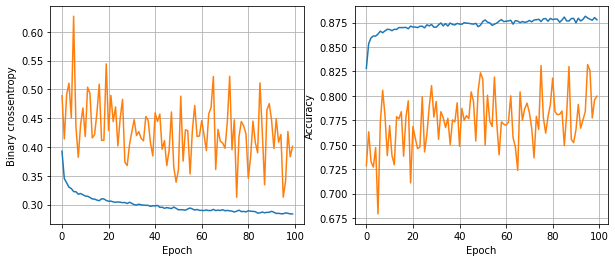

119/119 [==============================] - 0s 839us/step - loss: 0.3292 - accuracy: 0.8738
16 nodes, dropout 0, lr 0.01, batch size 64


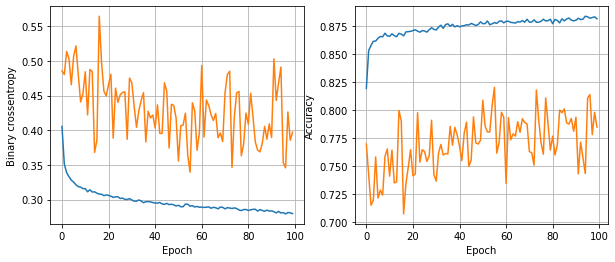

119/119 [==============================] - 0s 825us/step - loss: 0.3131 - accuracy: 0.8749
16 nodes, dropout 0, lr 0.01, batch size 128


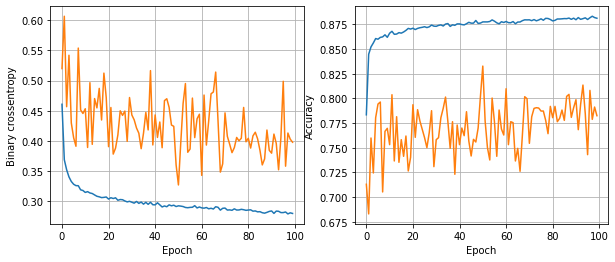

119/119 [==============================] - 0s 825us/step - loss: 0.3235 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.005, batch size 32


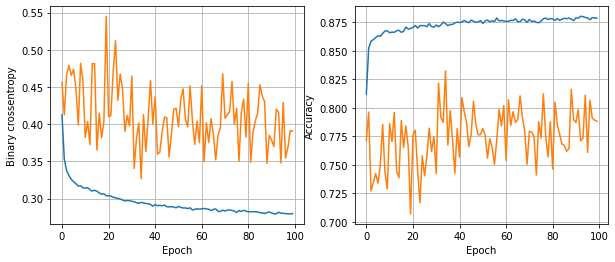

119/119 [==============================] - 0s 825us/step - loss: 0.3377 - accuracy: 0.8678
16 nodes, dropout 0, lr 0.005, batch size 64


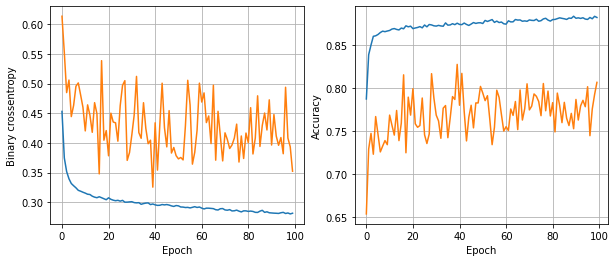

119/119 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.005, batch size 128


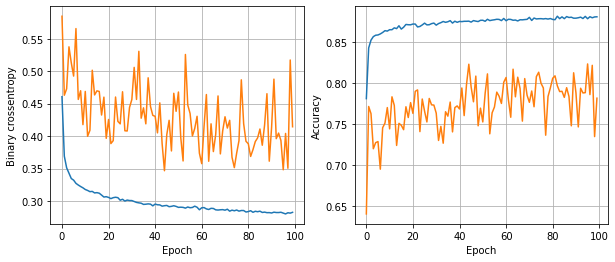

119/119 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8720
16 nodes, dropout 0, lr 0.001, batch size 32


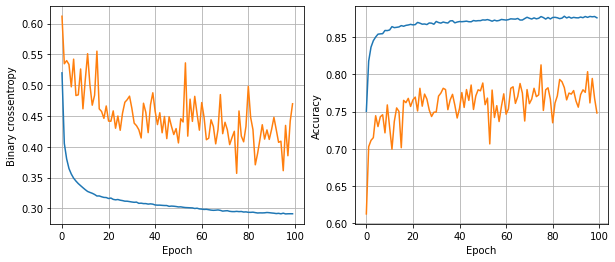

119/119 [==============================] - 0s 941us/step - loss: 0.3205 - accuracy: 0.8733
16 nodes, dropout 0, lr 0.001, batch size 64


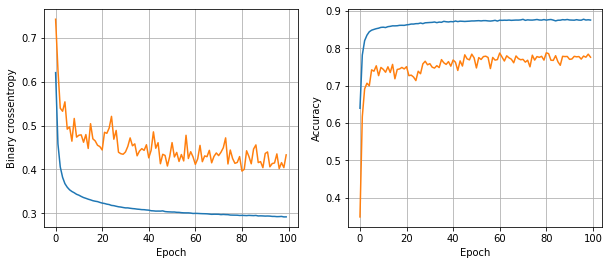

119/119 [==============================] - 0s 838us/step - loss: 0.3166 - accuracy: 0.8736
16 nodes, dropout 0, lr 0.001, batch size 128


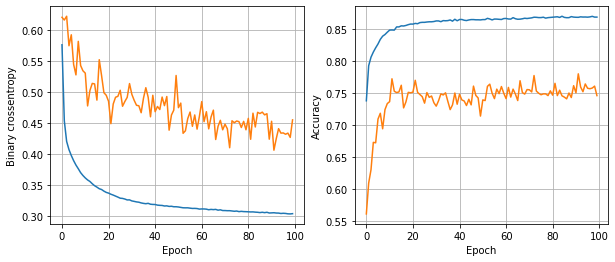

119/119 [==============================] - 0s 812us/step - loss: 0.3285 - accuracy: 0.8659
16 nodes, dropout 0.2, lr 0.01, batch size 32


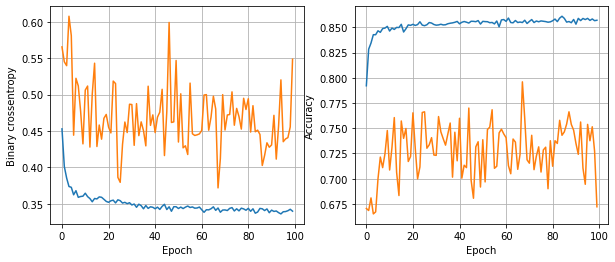

119/119 [==============================] - 0s 878us/step - loss: 0.3450 - accuracy: 0.8557
16 nodes, dropout 0.2, lr 0.01, batch size 64


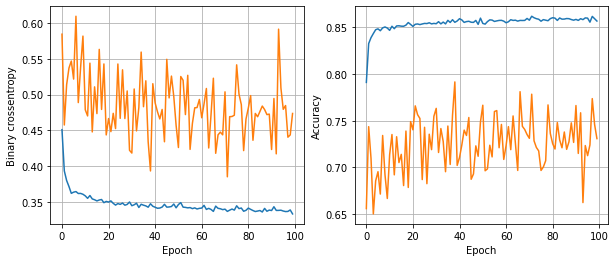

119/119 [==============================] - 0s 828us/step - loss: 0.3258 - accuracy: 0.8675
16 nodes, dropout 0.2, lr 0.01, batch size 128


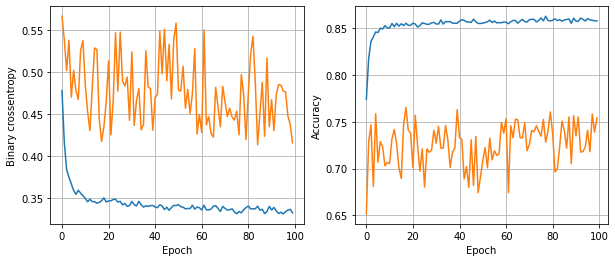

119/119 [==============================] - 0s 818us/step - loss: 0.3212 - accuracy: 0.8675
16 nodes, dropout 0.2, lr 0.005, batch size 32


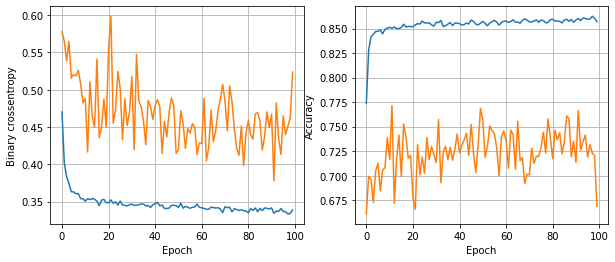

119/119 [==============================] - 0s 879us/step - loss: 0.3373 - accuracy: 0.8559
16 nodes, dropout 0.2, lr 0.005, batch size 64


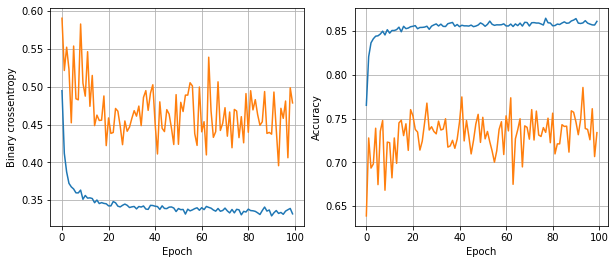

119/119 [==============================] - 0s 811us/step - loss: 0.3275 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.005, batch size 128


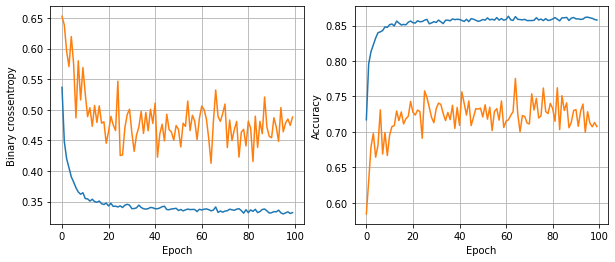

119/119 [==============================] - 0s 826us/step - loss: 0.3271 - accuracy: 0.8591
16 nodes, dropout 0.2, lr 0.001, batch size 32


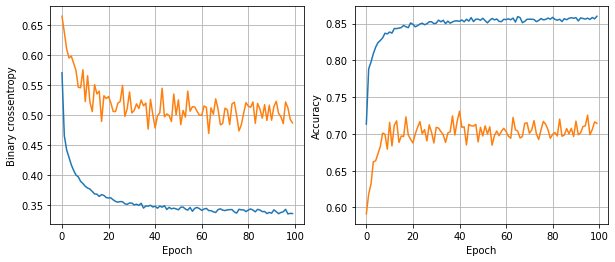

119/119 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8612
16 nodes, dropout 0.2, lr 0.001, batch size 64


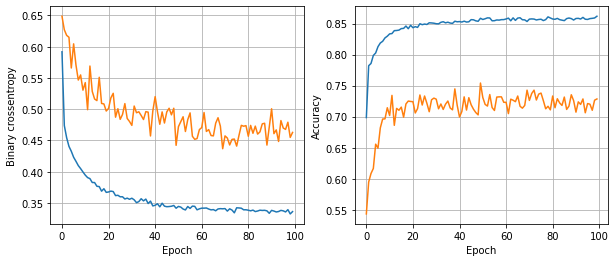

119/119 [==============================] - 0s 845us/step - loss: 0.3289 - accuracy: 0.8675
16 nodes, dropout 0.2, lr 0.001, batch size 128


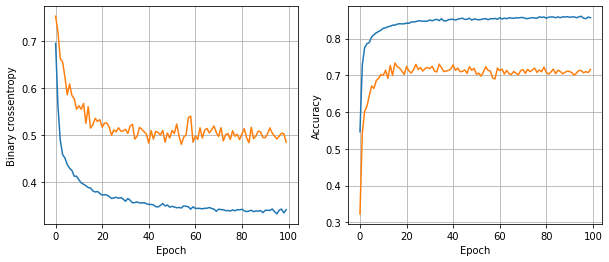

119/119 [==============================] - 0s 963us/step - loss: 0.3264 - accuracy: 0.8644
32 nodes, dropout 0, lr 0.01, batch size 32


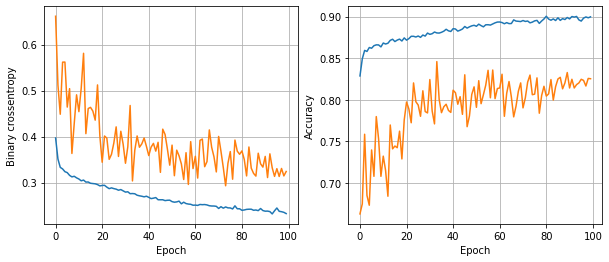

119/119 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.01, batch size 64


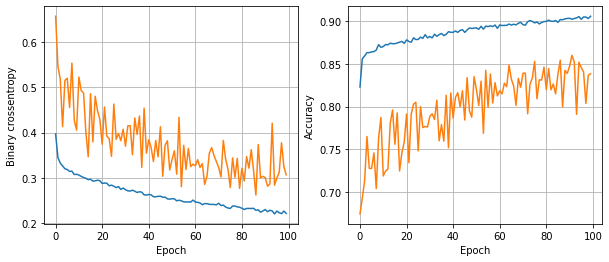

119/119 [==============================] - 0s 761us/step - loss: 0.4055 - accuracy: 0.8630
32 nodes, dropout 0, lr 0.01, batch size 128


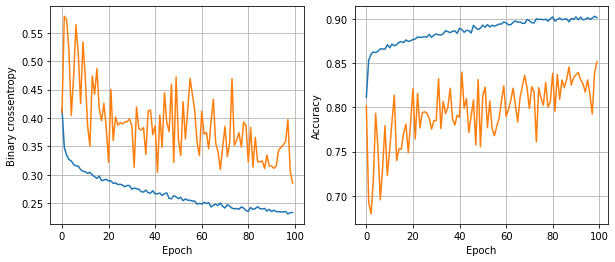

119/119 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8709
32 nodes, dropout 0, lr 0.005, batch size 32


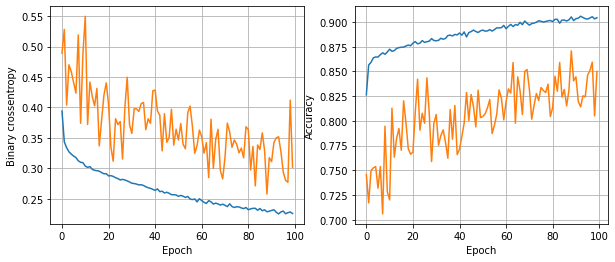

119/119 [==============================] - 0s 911us/step - loss: 0.3995 - accuracy: 0.8686
32 nodes, dropout 0, lr 0.005, batch size 64


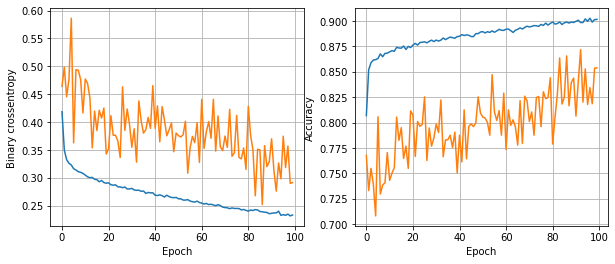

119/119 [==============================] - 0s 997us/step - loss: 0.3481 - accuracy: 0.8680
32 nodes, dropout 0, lr 0.005, batch size 128


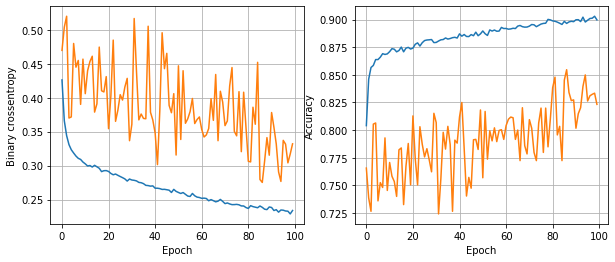

119/119 [==============================] - 0s 822us/step - loss: 0.3731 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.001, batch size 32


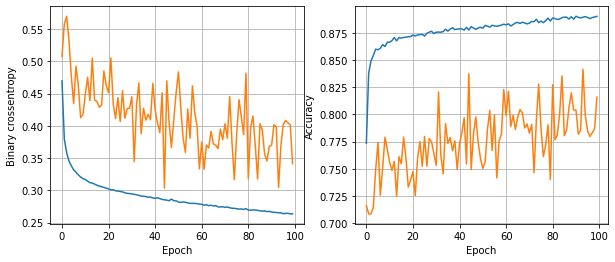

119/119 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8715
32 nodes, dropout 0, lr 0.001, batch size 64


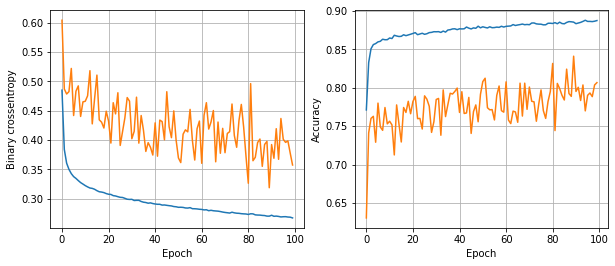

119/119 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.001, batch size 128


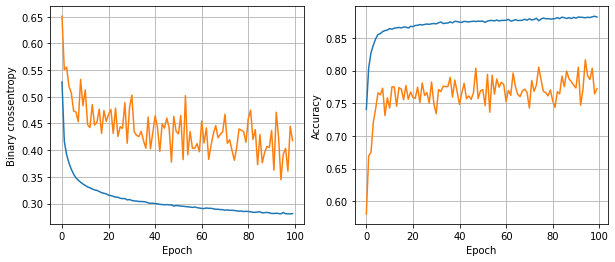

119/119 [==============================] - 0s 1ms/step - loss: 0.3243 - accuracy: 0.8725
32 nodes, dropout 0.2, lr 0.01, batch size 32


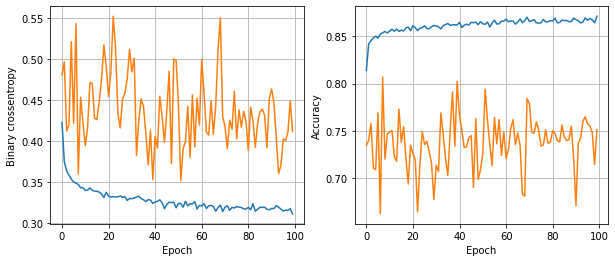

119/119 [==============================] - 0s 1ms/step - loss: 0.3178 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.01, batch size 64


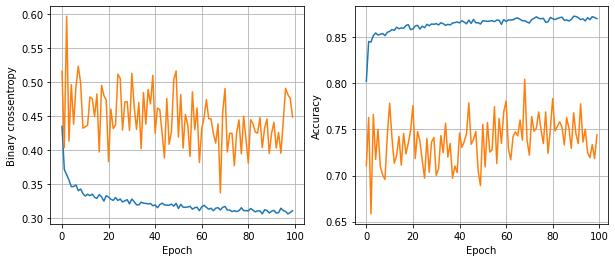

119/119 [==============================] - 0s 934us/step - loss: 0.3136 - accuracy: 0.8670
32 nodes, dropout 0.2, lr 0.01, batch size 128


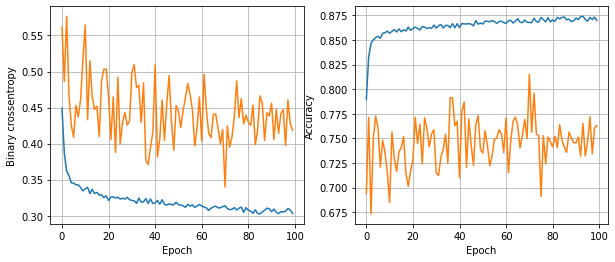

119/119 [==============================] - 0s 828us/step - loss: 0.3124 - accuracy: 0.8722
32 nodes, dropout 0.2, lr 0.005, batch size 32


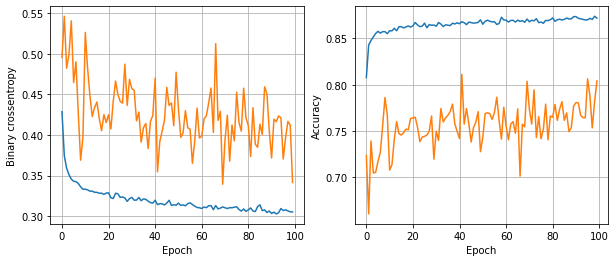

119/119 [==============================] - 0s 801us/step - loss: 0.3178 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.005, batch size 64


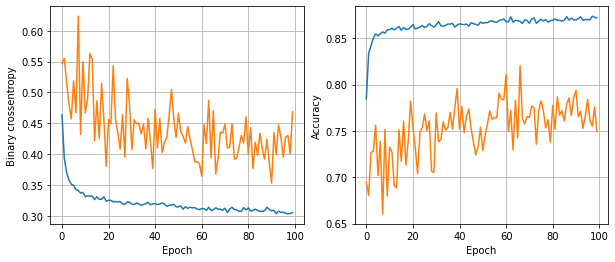

119/119 [==============================] - 0s 879us/step - loss: 0.3142 - accuracy: 0.8775
32 nodes, dropout 0.2, lr 0.005, batch size 128


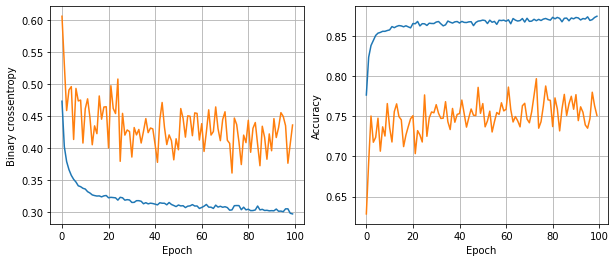

119/119 [==============================] - 0s 807us/step - loss: 0.3183 - accuracy: 0.8730
32 nodes, dropout 0.2, lr 0.001, batch size 32


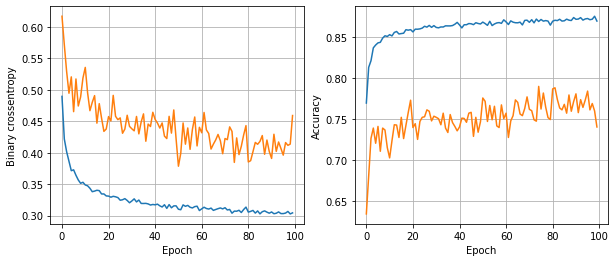

119/119 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.8715
32 nodes, dropout 0.2, lr 0.001, batch size 64


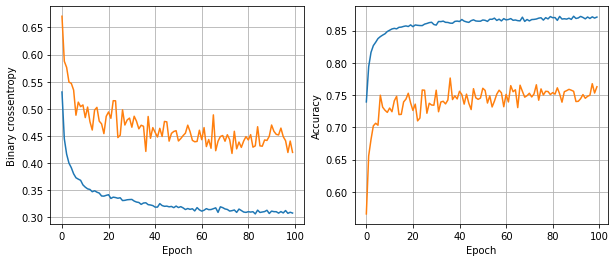

119/119 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8762
32 nodes, dropout 0.2, lr 0.001, batch size 128


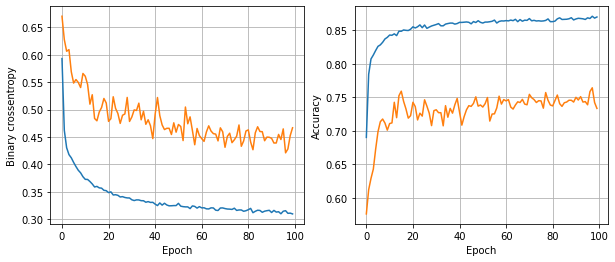

119/119 [==============================] - 0s 776us/step - loss: 0.3157 - accuracy: 0.8688
64 nodes, dropout 0, lr 0.01, batch size 32


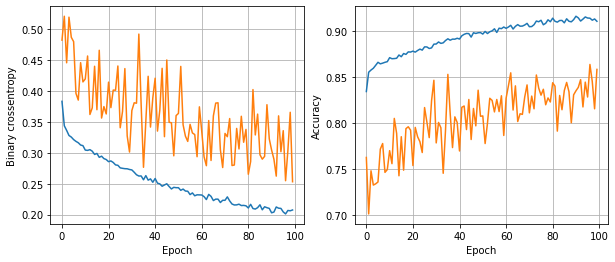

119/119 [==============================] - 0s 791us/step - loss: 0.4970 - accuracy: 0.8562
64 nodes, dropout 0, lr 0.01, batch size 64


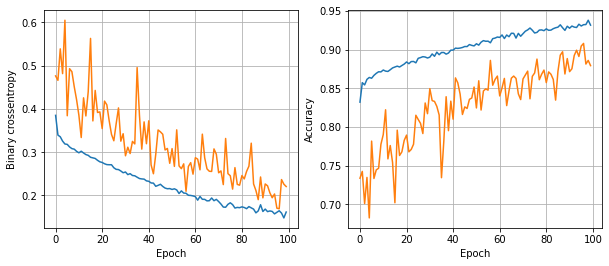

119/119 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.8588
64 nodes, dropout 0, lr 0.01, batch size 128


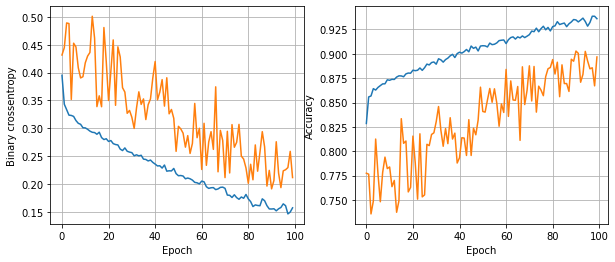

119/119 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.8538
64 nodes, dropout 0, lr 0.005, batch size 32


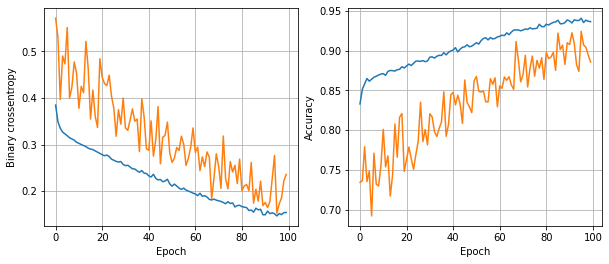

119/119 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.8549
64 nodes, dropout 0, lr 0.005, batch size 64


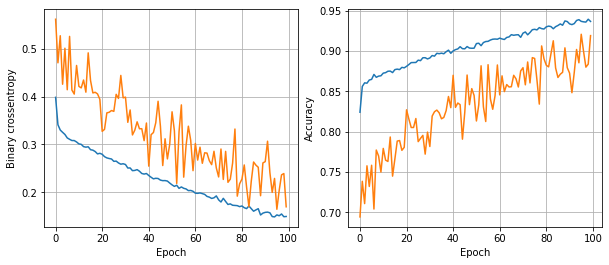

119/119 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.8588
64 nodes, dropout 0, lr 0.005, batch size 128


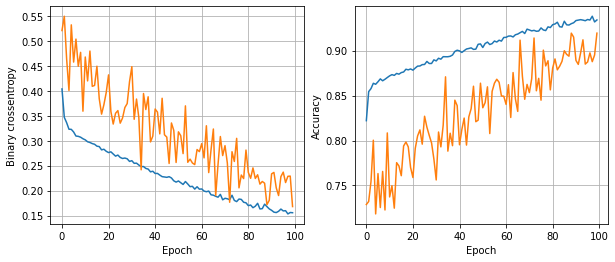

119/119 [==============================] - 0s 794us/step - loss: 0.5102 - accuracy: 0.8615
64 nodes, dropout 0, lr 0.001, batch size 32


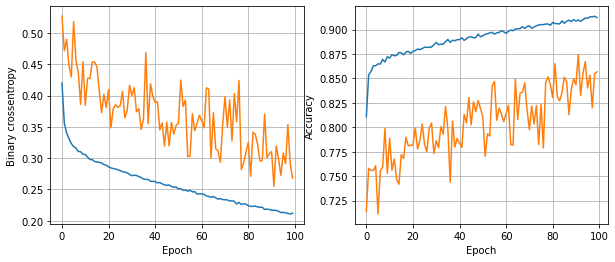

119/119 [==============================] - 0s 1ms/step - loss: 0.3907 - accuracy: 0.8580
64 nodes, dropout 0, lr 0.001, batch size 64


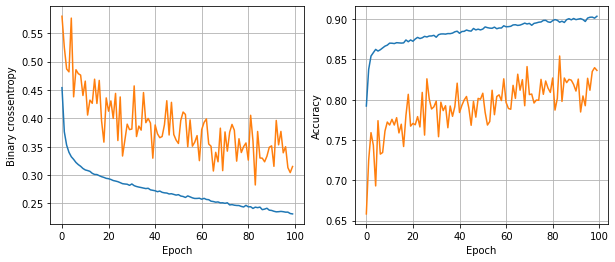

119/119 [==============================] - 0s 813us/step - loss: 0.3440 - accuracy: 0.8672
64 nodes, dropout 0, lr 0.001, batch size 128


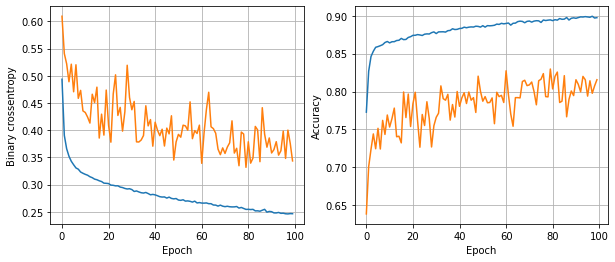

119/119 [==============================] - 0s 786us/step - loss: 0.3263 - accuracy: 0.8654
64 nodes, dropout 0.2, lr 0.01, batch size 32


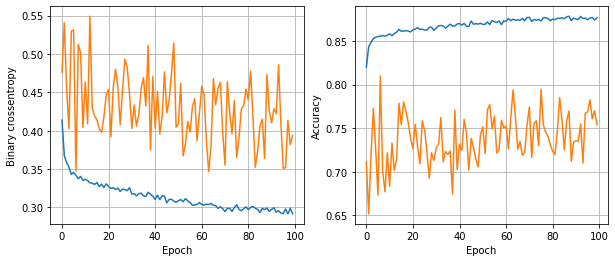

119/119 [==============================] - 0s 812us/step - loss: 0.3243 - accuracy: 0.8670
64 nodes, dropout 0.2, lr 0.01, batch size 64


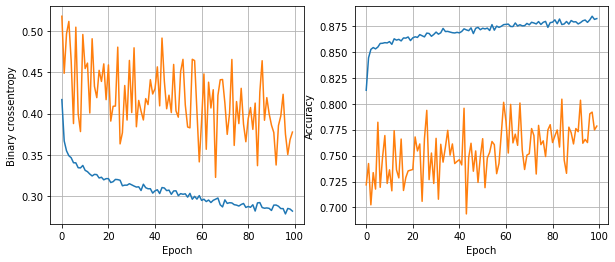

119/119 [==============================] - 0s 801us/step - loss: 0.3200 - accuracy: 0.8738
64 nodes, dropout 0.2, lr 0.01, batch size 128


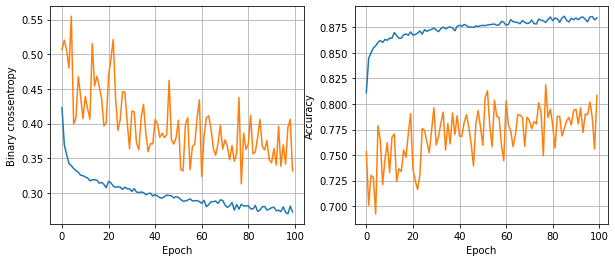

119/119 [==============================] - 0s 980us/step - loss: 0.3127 - accuracy: 0.8759
64 nodes, dropout 0.2, lr 0.005, batch size 32


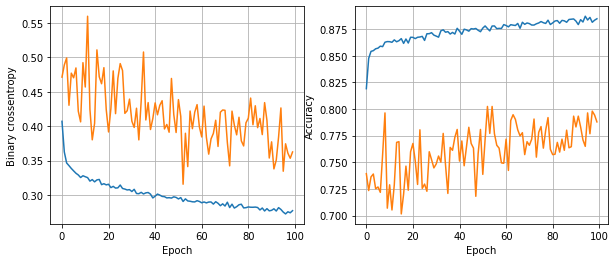

119/119 [==============================] - 0s 812us/step - loss: 0.3125 - accuracy: 0.8754
64 nodes, dropout 0.2, lr 0.005, batch size 64


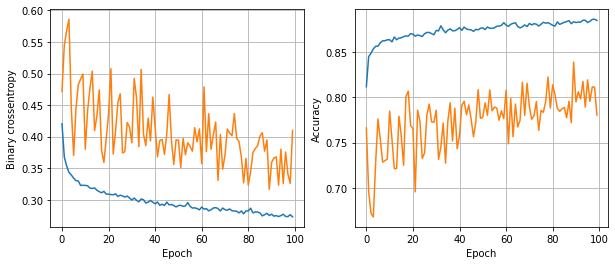

119/119 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8749
64 nodes, dropout 0.2, lr 0.005, batch size 128


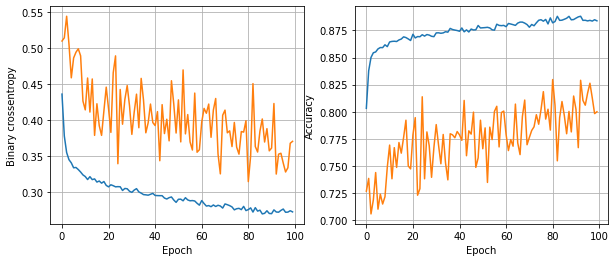

119/119 [==============================] - 0s 987us/step - loss: 0.3071 - accuracy: 0.8743
64 nodes, dropout 0.2, lr 0.001, batch size 32


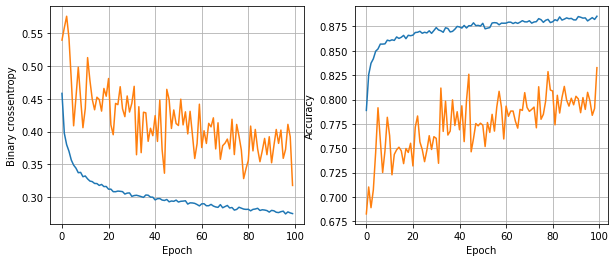

119/119 [==============================] - 0s 772us/step - loss: 0.3088 - accuracy: 0.8746
64 nodes, dropout 0.2, lr 0.001, batch size 64


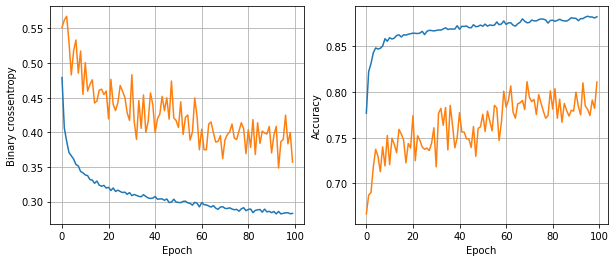

119/119 [==============================] - 0s 779us/step - loss: 0.3055 - accuracy: 0.8762
64 nodes, dropout 0.2, lr 0.001, batch size 128


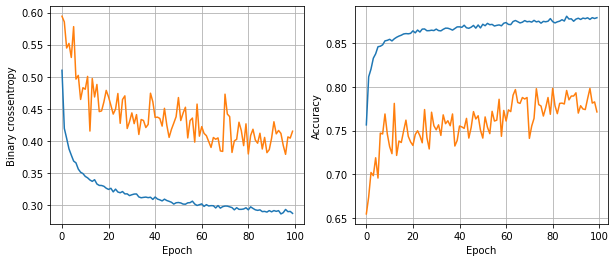

119/119 [==============================] - 0s 753us/step - loss: 0.3039 - accuracy: 0.8767


In [28]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model